<a href="https://colab.research.google.com/github/Muhammad-Hashir-Khalil-Yousafzai/Image-to-WebPage/blob/main/Assignment(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE PREDICTION USING LINEAR REGRESSION**
Hi! My name is **Muhammad Hashir Khalil**.Today we will try to solve a regression problem task assigned by **Dr. Syed Saqlain Ali Shah Gilani**. In this assignment we will use *linear regression model to predict house price* in islambad,karachi and rawalpindi etc.All though the model is not much suitable for house price prediction but its the first step of my journey is the field of Machine Learning.

 ***Loading the important libraries:***



In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

***Loading the CSV-file***


In [32]:
df = pd.read_csv('/content/drive/MyDrive/Zameen Data/zameen-property-data.csv')
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director


# **Exploratory Data Analysis (EDA)**

***Dropping unecessary coulmn***: We have to drop those coulmns which do not have any effect or considerable effect on your target variable

In [33]:
df.drop(['location_id','property_id', 'page_url','date_added', 'agency', 'agent'], axis=1, inplace=True)


In [34]:
df.isnull().sum()

,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0
baths,0
area,0
purpose,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   location       168446 non-null  object 
 3   city           168446 non-null  object 
 4   province_name  168446 non-null  object 
 5   latitude       168446 non-null  float64
 6   longitude      168446 non-null  float64
 7   baths          168446 non-null  int64  
 8   area           168446 non-null  object 
 9   purpose        168446 non-null  object 
 10  bedrooms       168446 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 14.1+ MB


In [36]:
data = pd.get_dummies(df, columns=['purpose'], drop_first=1)
df=data
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,bedrooms,purpose_For Sale
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,2,True
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,3,True
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,5,True
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,4,True
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,3,True


In [37]:
# province=df.groupby('province_name')['price'].mean()
# df['province_name']=df['province_name'].map(province)
# df.head()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['province_name'] = le.fit_transform(df['province_name'])
data['city'] = le.fit_transform(data['city'])

property_type=df.groupby('property_type')['price'].mean()
df['property_type']=df['property_type'].map(property_type)
loc=df.groupby('location')['price'].mean()
df['location']=df['location'].map(loc)
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,bedrooms,purpose_For Sale
0,8.253729e+06,10000000,1.095402e+07,1,0,33.679890,73.012640,2,4 Marla,2,True
1,8.253729e+06,6900000,7.596978e+06,1,0,33.700993,72.971492,3,5.6 Marla,3,True
2,2.455157e+07,16500000,7.887304e+06,1,0,33.631486,72.926559,6,8 Marla,5,True
3,2.455157e+07,43500000,9.183744e+06,1,0,33.707573,73.151199,4,2 Kanal,4,True
4,2.455157e+07,7000000,3.931107e+07,1,0,33.492591,73.301339,3,8 Marla,3,True


In [38]:
def convert_kanal_to_marla(area):
    try:
        area = area.strip().replace(',', '')

        if 'Kanal' in area:
            # Extract the number and convert to float, multiply by 20 to get Marlas
            value = float(area.replace('Kanal', '').strip())
            return value * 20
        elif 'Marla' in area:
            # If already in Marla, just return the numeric part
            value = float(area.replace('Marla', '').strip())
            return value
        else:
            # If neither Kanal nor Marla, return NaN or handle appropriately
            return None
    except ValueError as e:
        # Handle any conversion errors
        print(f"Error converting '{area}': {e}")
        return None

# Applying the conversion function to your dataframe column
df['area'] = df['area'].apply(convert_kanal_to_marla)


<Axes: xlabel='price', ylabel='Count'>

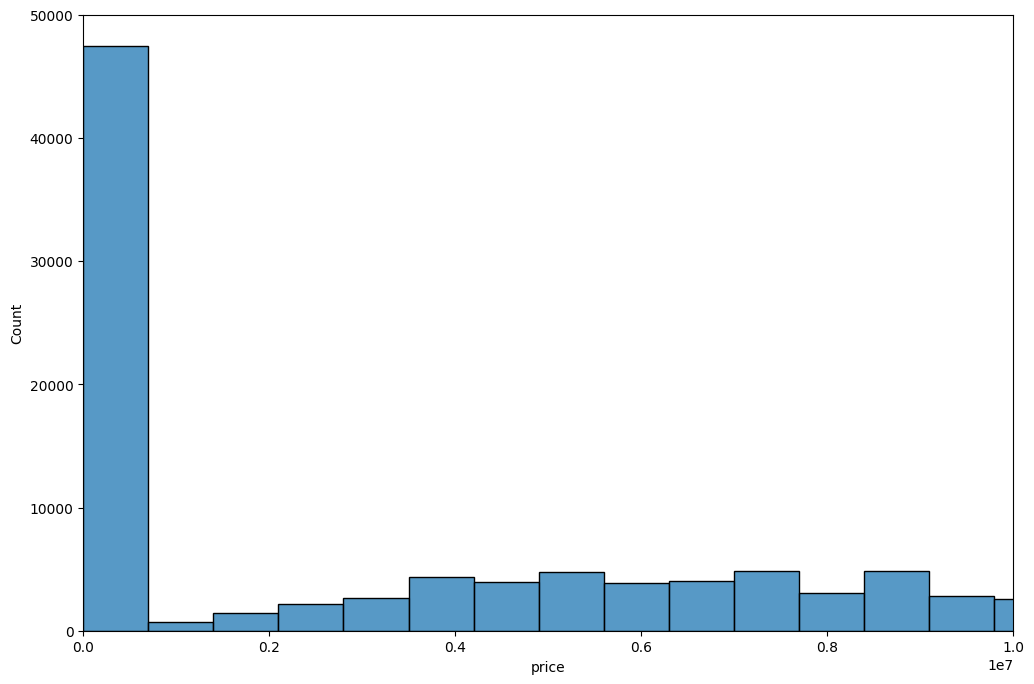

In [39]:
plt.figure(figsize=(12,8))
plt.xlim(0, 10000000)
plt.ylim(0, 50000)
sns.histplot(data=df, x=df['price'])

In [40]:
print(df['price'].describe())

count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64


In [41]:
zero_price_count = (df["price"] < 5000).sum()
print(f"Number of zero values in price: {zero_price_count}")


Number of zero values in price: 28


In [42]:
print(df['baths'].describe())

count    168446.000000
mean          2.874227
std           2.463400
min           0.000000
25%           0.000000
50%           3.000000
75%           4.000000
max         403.000000
Name: baths, dtype: float64


In [43]:
df.drop(df[df['baths'] == 0].index, inplace=True)
df.drop(df[df['price'] == 0].index, inplace=True)
df.drop(df[df['bedrooms'] == 0].index, inplace=True)
df.drop(df[df['area'] == 0].index, inplace=True)

In [44]:
df=np.log1p(df)

# **Regression Model**

In [45]:
from sklearn.model_selection import train_test_split
# df2 = df # backup

# X = df.drop(['province_name', 'city', 'property_type', 'purpose'], axis=1)
X = df.drop('price', axis=1)
y = df['price']

print(X)
print(y)

        property_type   location      city  province_name  latitude  \
0           15.926176  16.209217  0.693147       0.000000  3.546160   
1           15.926176  15.843261  0.693147       0.000000  3.546768   
2           17.016286  15.880765  0.693147       0.000000  3.544763   
3           17.016286  16.032946  0.693147       0.000000  3.546958   
4           17.016286  17.487017  0.693147       0.000000  3.540745   
...               ...        ...       ...            ...       ...   
168436      17.016286  16.239594  1.098612       1.098612  3.260860   
168437      17.016286  16.239594  1.098612       1.098612  3.260673   
168438      17.016286  16.239594  1.098612       1.098612  3.260327   
168439      17.016286  16.239594  1.098612       1.098612  3.258317   
168445      17.016286  16.239594  1.098612       1.098612  3.262455   

        longitude     baths      area  bedrooms  purpose_For Sale  
0        4.304236  1.098612  1.609438  1.098612          0.693359  
1        4.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print('X_train', X_train)
print('y_train', y_train)

X_train         property_type   location      city  province_name  latitude  \
1067        17.016286  16.018903  1.609438       0.693147  3.541045   
103755      15.926176  17.487017  1.098612       1.098612  3.252039   
2388        13.017104  17.313731  0.693147       0.000000  3.547328   
25253       17.016286  16.779122  1.386294       0.693147  3.475738   
43862       17.016286  15.838516  1.386294       0.693147  3.484172   
...               ...        ...       ...            ...       ...   
159084      17.016286  16.655955  1.386294       0.693147  3.479977   
134581      17.016286  17.487017  1.386294       0.693147  3.480194   
975         17.016286  17.487017  1.386294       0.693147  3.480586   
18702       15.926176  16.018903  1.609438       0.693147  3.542410   
162481      15.926176  16.018903  1.609438       0.693147  3.541569   

        longitude     baths      area  bedrooms  purpose_For Sale  
1067     4.305445  1.386294  1.791759  1.386294          0.000000  
103

In [47]:
print('X_test', X_test)
print('y_test', y_test)

X_test         property_type   location      city  province_name  latitude  \
39271       17.016286  15.631319  1.386294       0.693147  3.481307   
41477       17.016286  16.521416  1.098612       1.098612  3.258247   
157348      17.016286  17.826829  0.693147       0.000000  3.547529   
146082      17.016286  16.088529  0.693147       0.000000  3.545300   
85498       17.016286  18.199140  1.386294       0.693147  3.480882   
...               ...        ...       ...            ...       ...   
20932       17.016286  16.931577  1.386294       0.693147  3.479603   
95607       17.016286  16.405421  1.386294       0.693147  3.480577   
100780      14.566743  16.755891  1.098612       1.098612  3.255522   
76793       17.016286  16.844554  0.693147       0.000000  3.546365   
11094       17.016286  15.620810  0.693147       0.000000  3.544328   

        longitude     baths      area  bedrooms  purpose_For Sale  
39271    4.321924  1.386294  1.386294  1.609438          0.693359  
4147

In [48]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  property_type     price  location      city  province_name  \
property_type          1.000000  0.562221  0.087243  0.225379       0.049153   
price                  0.562221  1.000000  0.225417  0.247643       0.230760   
location               0.087243  0.225417  1.000000  0.068267       0.116645   
city                   0.225379  0.247643  0.068267  1.000000       0.455770   
province_name          0.049153  0.230760  0.116645  0.455770       1.000000   
latitude               0.119152 -0.110715 -0.159074 -0.024138      -0.845313   
longitude              0.232832  0.037171 -0.056589  0.127617      -0.696034   
baths                  0.464084  0.403665  0.297117  0.080670      -0.109307   
area                   0.089221  0.152125  0.433127 -0.055493      -0.162959   
bedrooms               0.473901  0.401931  0.237002  0.060985      -0.073316   
purpose_For Sale       0.490394  0.928609  0.024791  0.278387       0.274675   

                  latitude  longitude  

In [49]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = linear_model.LinearRegression()

regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [50]:
y_pred = regressor.predict(X_test_scaled)
print('predicted y', y_pred)
print('actual y', y_test)

predicted y [15.51887634 16.62716127 12.53755055 ... 11.06226172 12.16772321
 16.38188278]
actual y 39271     15.201805
41477     16.283610
157348    12.611541
146082    10.819798
85498     16.972511
            ...    
20932     17.312018
95607     15.869634
100780    11.002117
76793     12.100718
11094     15.761421
Name: price, Length: 37684, dtype: float64


In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse =mean_squared_error(y_test, y_pred, squared=False)
cross_val_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

print('r squared', r2)
print('mean absolute error', mae)
print('mean squared error', mse)
print('root mean squared error', rmse)
print('cross validation score', cross_val_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


r squared 0.9660257009441535
mean absolute error 0.31923644601189755
mean squared error 0.2317250639354739
root mean squared error 0.4813782960785352
cross validation score [0.96103399 0.97011938 0.97108061 0.96467799 0.96320808]


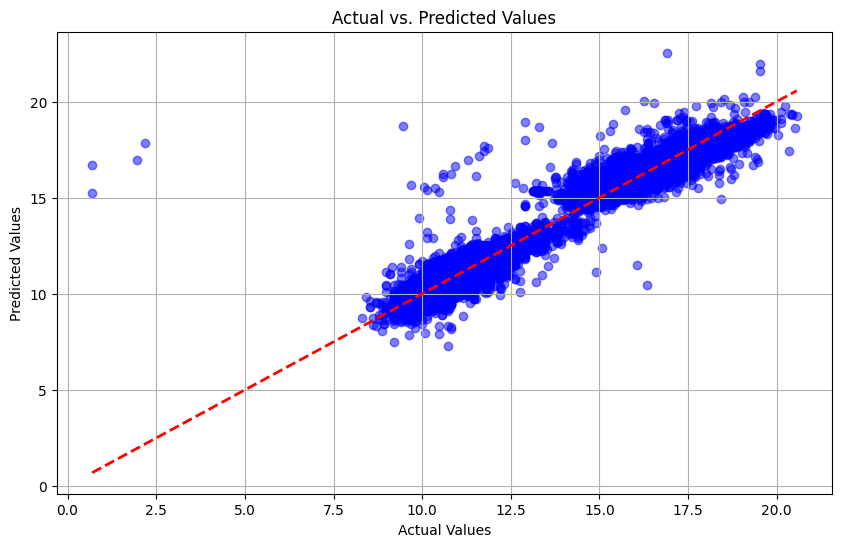

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # line for perfect predictions
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()
